In the following example, we will use multiple linear regression to predict the stock index price (i.e., the dependent variable) of a fictitious economy by using 2 independent/input variables:

* Interest Rate
* Unemployment Rate

we will have to validate that several assumptions are met before we apply linear regression models. Most notably,we have to make sure that a linear relationship exists between the dependent variable and the independent variables.

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Load Dataset

In [2]:
df = pd.read_excel('Stock_data.xlsx')
print(df)

    Interest Rate  Unemployement_rate  Stock_index_price
0            2.75                 5.3               1464
1            2.50                 5.3               1394
2            2.50                 5.3               1357
3            2.50                 5.3               1293
4            2.50                 5.4               1256
5            2.50                 5.6               1254
6            2.50                 5.5               1234
7            2.25                 5.5               1195
8            2.25                 5.5               1159
9            2.25                 5.6               1167
10           2.00                 5.7               1130
11           2.00                 5.9               1075
12           2.00                 6.0               1047
13           1.75                 5.9                965
14           1.75                 5.8                943
15           1.75                 6.1                958
16           1.75              

# Checking for Linearity

Before you execute a linear regression model, it is advisable to validate that certain assumptions are met.

As noted earlier, you may want to check that a linear relationship exists between the dependent variable and the independent variable/s.

In our example, you may want to check that a linear relationship exists between the:

* Stock_Index_Price (dependent variable) and Interest_Rate (independent variable)
* Stock_Index_Price (dependent variable) and Unemployment_Rate (independent variable)

To perform a quick linearity check, you can use scatter diagrams (utilizing the matplotlib library). For example, you can use the code below in order to plot the relationship between the Stock_Index_Price and the Interest_Rate:

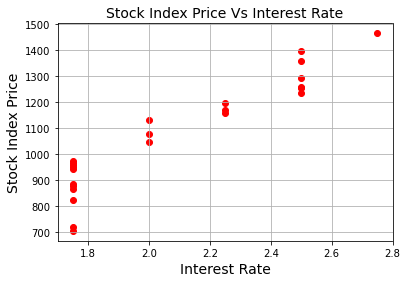

In [3]:
plt.scatter(df['Interest Rate'], df['Stock_index_price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

You’ll notice that indeed a linear relationship exists between the Stock_Index_Price and the Interest_Rate. Specifically, when interest rates go up, the stock index price also goes up:

And for the second case, you can use this code in order to plot the relationship between the Stock_Index_Price and the Unemployment_Rate:

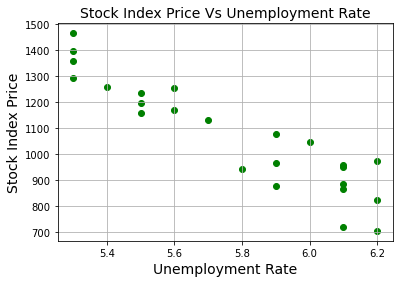

In [4]:
plt.scatter(df['Unemployement_rate'], df['Stock_index_price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

As you can see, a linear relationship also exists between the Stock_Index_Price and the Unemployment_Rate – when the unemployment rates go up, the stock index price goes down (here we still have a linear relationship, but with a negative slope):

Next, we are going to perform the actual multiple linear regression in Python.

# Performing the Multiple Linear Regression
Once you added the data into Python, you may use both sklearn and statsmodels to get the regression results.

Either method would work, but let’s review both methods for illustration purposes.

You may then copy the code below into Python:

In [5]:
X = df[['Interest Rate','Unemployement_rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_index_price']


In [6]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X.values, Y)

LinearRegression()

In [7]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1798.4039776258546
Coefficients: 
 [ 345.54008701 -250.14657137]


In [8]:
# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

Predicted Stock Index Price: 
 [1422.86238865]


In [9]:
# with statsmodels
X = sm.add_constant(X) # adding a constant

In [10]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

In [11]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Stock_index_price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Thu, 05 May 2022   Prob (F-statistic):           4.04e-11
Time:                        15:33:51   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1798.4040    899

Once you run the code in Python, you’ll observe three parts:

**(1) The first part shows the output generated by sklearn:**
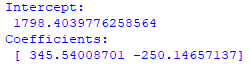

This output includes the intercept and coefficients. You can use this information to build the multiple linear regression equation as follows:

Stock_Index_Price = (Intercept) + (Interest_Rate coef)*X1 + (Unemployment_Rate coef)*X2

And once you plug the numbers:

Stock_Index_Price = (1798.4040) + (345.5401)*X1 + (-250.1466)*X2

**(2) The second part displays the predicted output using sklearn:**
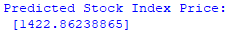

Imagine that you want to predict the stock index price after you collected the following data:

* Interest Rate = 2.75 (i.e., X1= 2.75)
* Unemployment Rate = 5.3 (i.e., X2= 5.3)

If you plug that data into the regression equation, you’ll get the same predicted result as displayed in the second part:

Stock_Index_Price = (1798.4040) + (345.5401)*(2.75) + (-250.1466)*(5.3) = 1422.86

**(3) The third part displays a comprehensive table with statistical info generated by statsmodels.**

This information can provide you additional insights about the model used (such as the fit of the model, standard errors, etc):
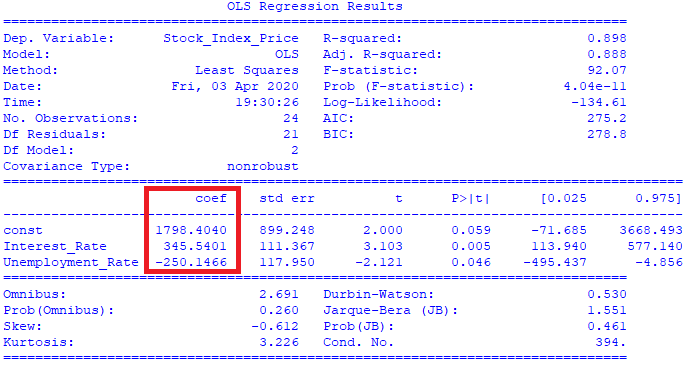

Notice that the coefficients captured in this table (highlighted in red) match with the coefficients generated by sklearn.

That’s a good sign! we got consistent results by applying both sklearn and statsmodels.

Next, you’ll see how to create a GUI in Python to gather input from users, and then display the prediction results.

# GUI used for the Multiple Linear Regression in Python
This is where the real fun begins!

Why not create a Graphical User Interface (GUI) that will allow users to input the independent variables in order to get the predicted result?

It may be that some of the users may not know much about inputting the data in the Python code itself, so it makes sense to create them a simple interface where they can manage the data in a simplified manner.

You can even create a batch file to launch the Python program, and so the users will just need to double-click on the batch file in order to launch the GUI.

Here is the full Python code for your ultimate Regression GUI:

In [12]:
X = df[['Interest Rate','Unemployement_rate']].astype(float) # here we have 2 input variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_index_price'].astype(float) # output variable (what we are trying to predict)

In [13]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X.values, Y)

LinearRegression()

In [14]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1798.4039776258546
Coefficients: 
 [ 345.54008701 -250.14657137]


In [15]:
# tkinter GUI
root= tk.Tk()

In [16]:
canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

In [17]:
# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

1

In [18]:
# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

2

In [19]:
# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type Interest Rate: ')
canvas1.create_window(100, 100, window=label1)

3

In [20]:
entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

4

In [21]:
# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text=' Type Unemployment Rate: ')
canvas1.create_window(120, 120, window=label2)


5

In [22]:
entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

6

In [23]:
def values(): 
    global New_Interest_Rate #our 1st input variable
    New_Interest_Rate = float(entry1.get()) 
    
    global New_Unemployment_Rate #our 2nd input variable
    New_Unemployment_Rate = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Stock Index Price: ', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Stock Index Price',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 

7

In [24]:
#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['Interest Rate'].astype(float),df['Stock_index_price'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['Stock_Index_Price']) 
ax3.set_xlabel('Interest Rate')
ax3.set_title('Interest Rate Vs. Stock Index Price')


Text(0.5, 1.0, 'Interest Rate Vs. Stock Index Price')

In [25]:
#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['Unemployement_rate'].astype(float),df['Stock_index_price'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(['Stock_Index_Price']) 
ax4.set_xlabel('Unemployement_Rate')
ax4.set_title('Unemployment_Rate Vs. Stock Index Price')

Text(0.5, 1.0, 'Unemployment_Rate Vs. Stock Index Price')

In [26]:
root.mainloop()

Once you run the code, you’ll see the GUI, which includes the output generated by sklearn and the scatter diagrams

Recall that earlier we made a prediction by using the following values:

* Interest Rate = 2.75
* Unemployment Rate = 5.3
Type those values in the input boxes, and then click on the ‘Predict Stock Index Price’ button.

You’ll now see the predicted result of 1422.86, which matches with the value you saw before.

# Conclusion

Linear Regression is often used in Machine Learning. we have seen example of how to perform multiple linear regression in Python using both sklearn and statsmodels.

Before applying linear regression models, make sure to check that a linear relationship exists between the dependent variable (i.e., what you are trying to predict) and the independent variables (i.e., the input variables).